Data citation:
Cheng, Jun. "brain tumor dataset." Figshare. Dataset posted on 02/04/2017. https://figshare.com/articles/dataset/brain_tumor_dataset/1512427

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

-----
This data was used in the following paper:

1. Cheng, Jun, et al. "Enhanced Performance of Brain Tumor Classification via Tumor Region Augmentation
and Partition." PloS one 10.10 (2015).

2. Cheng, Jun, et al. "Retrieval of Brain Tumors by Adaptive Spatial Pooling and Fisher Vector 
Representation." PloS one 11.6 (2016). Matlab source codes are available on github 
https://github.com/chengjun583/brainTumorRetrieval

-----
Jun Cheng
School of Biomedical Engineering
Southern Medical University, Guangzhou, China
Email: chengjun583@qq.com

-----
Analytics Vidhya - Provided the basis for the model. “https://www.analyticsvidhya.com/blog/2021/06/brain-tumor-detection-and-localization-using-deep-learning-part-1/”

**Importing necessary libraries**

In [1]:
import os
folder = 'C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/'
os.chdir(folder + 'brainTumorDataPublic_1-3064')
import sys

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pandas as pd
import cv2
import scipy
from scipy import io
from itertools import chain
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import PIL
from PIL import Image

import seaborn as sns
from skimage import io

import tensorflow as tf
import keras.backend as k
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras import utils as np_utils
from tensorflow.keras.utils import to_categorical

%matplotlib inline
import random
from random import sample

Obtaining files from directory location

In [2]:
files = pd.DataFrame(glob('*.mat'))
files = files.values.tolist()
files = list(chain(*files))

nof = len(files)
nof

3064

In [3]:
print(files[0])

0001.mat


Extracting data from .mat files

In [4]:
P_ID = []
labels = []
tumlab = []
image_path = []
mask_path = []
mask = []
mri_png = []
mask_png = []

In [5]:
new_files = [x.replace('.mat', '') for x in files]

In [6]:
print(new_files[0])

0001


In [7]:
for x in new_files:
    f = h5py.File(x + '.mat', 'r')
    
    PID = f['cjdata']['PID']
    PID = list(chain(*PID))
    PID = ''.join([str(item) for item in PID])
    P_ID.append(PID)
    
    label = list(f['cjdata']['label'])
    for i in range(0, len(label)):
        label[i] = int(label[i])
    label = ''.join([str(item) for item in label])
    labels.append(label)
    
    if label == "1":
        newlabel = "Meningioma"
    elif label == "2":
        newlabel = "Glioma"
    elif label == "3":
        newlabel = "Pituitary Tumor"
    else:
        newlabel = "NaN"
    tumlab.append(newlabel)        
    
    
    mri_png.append(folder + 'images/' + x + '_mri.png')
    mask_png.append(folder + 'images/' + x + '_mask.png')

In [8]:
mri_png[0]

'C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0001_mri.png'

Importing MRI scan and Tumor Masks Method 1: Show image via matrix directly from .mat file

 File Location:   0001.mat


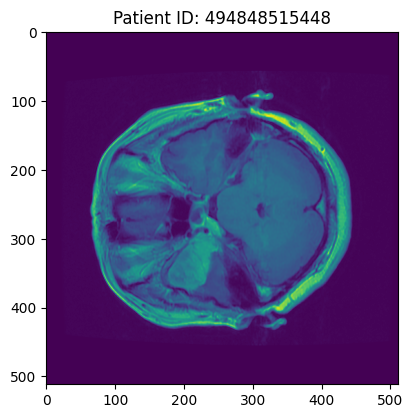

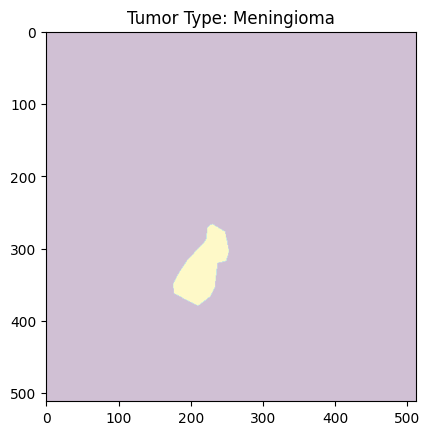

 File Location:   0002.mat


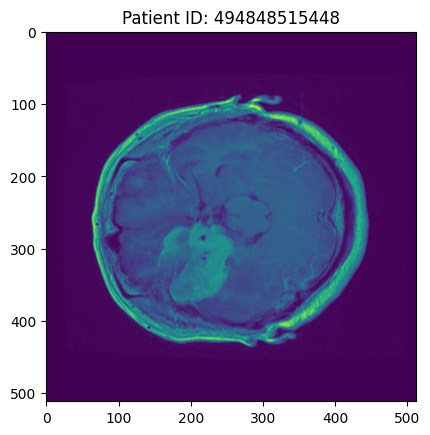

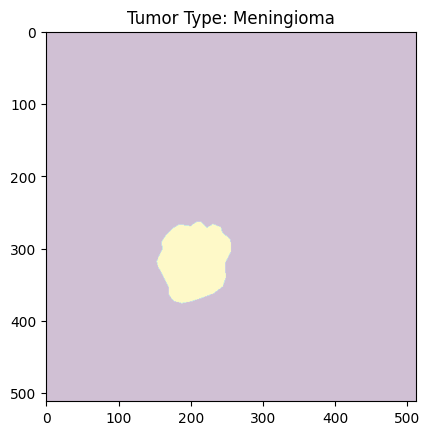

 File Location:   0003.mat


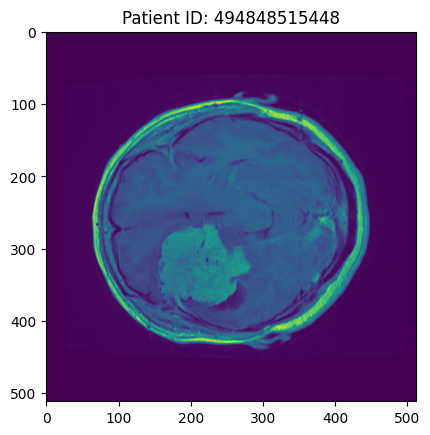

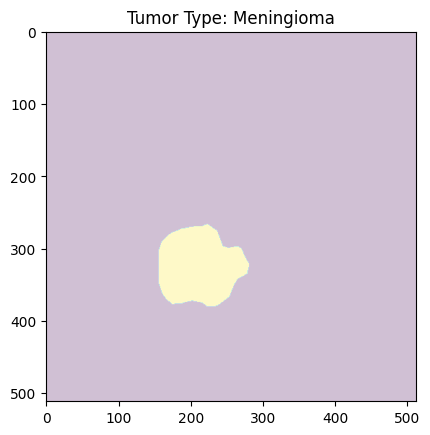

 File Location:   0004.mat


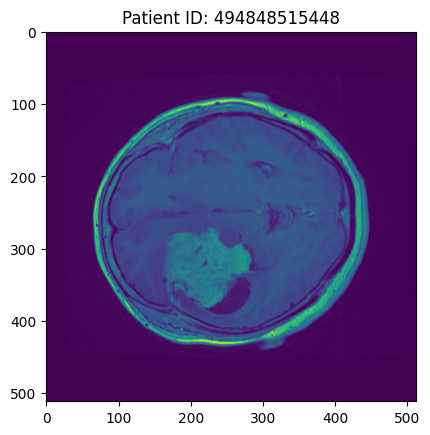

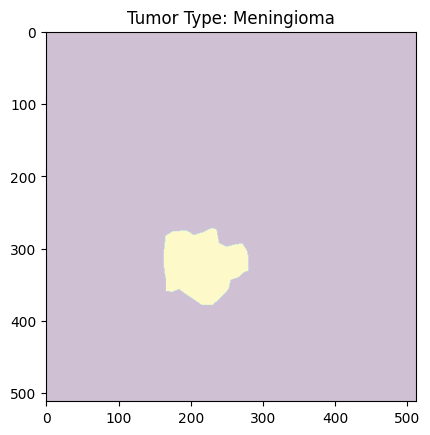

 File Location:   0005.mat


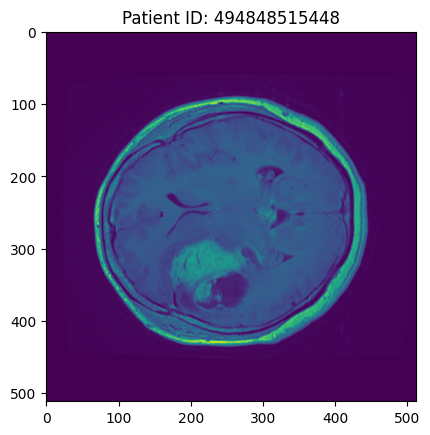

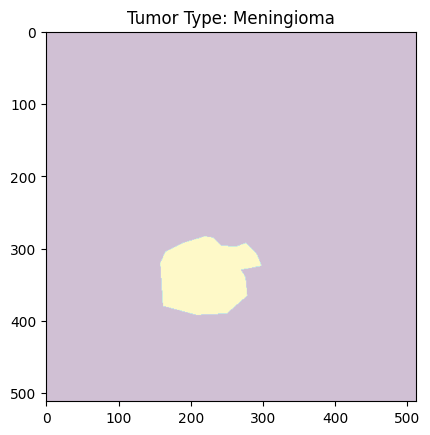

 File Location:   0006.mat


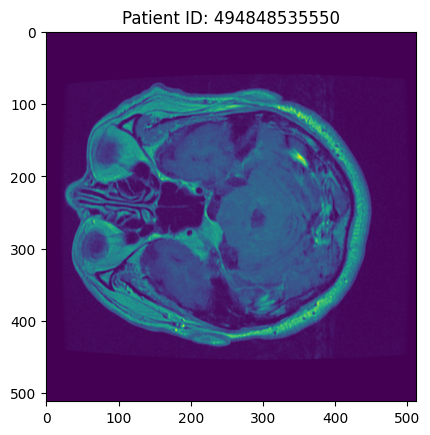

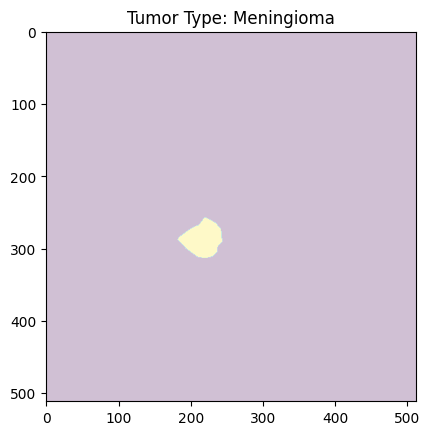

 File Location:   0007.mat


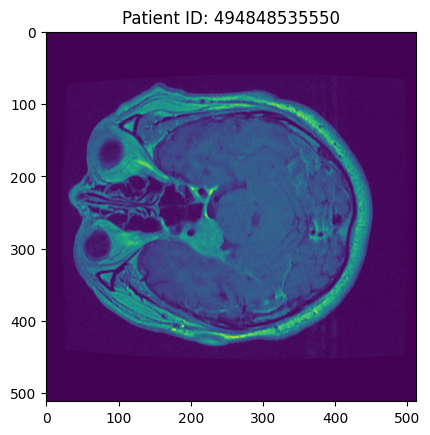

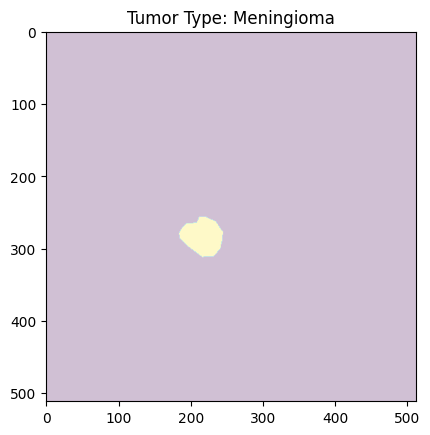

 File Location:   0008.mat


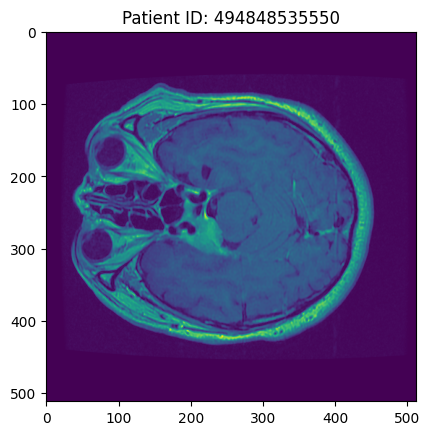

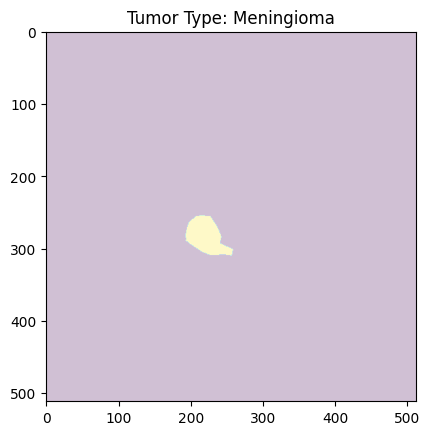

 File Location:   0009.mat


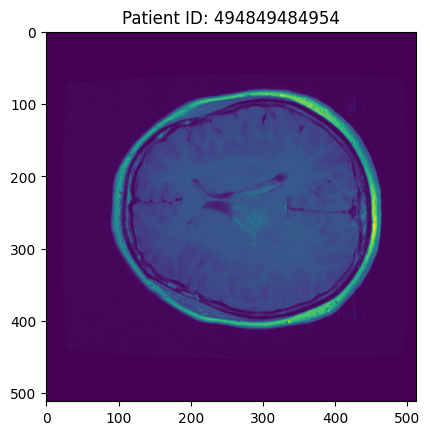

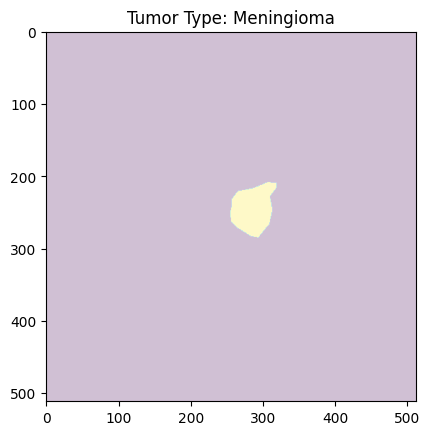

 File Location:   0010.mat


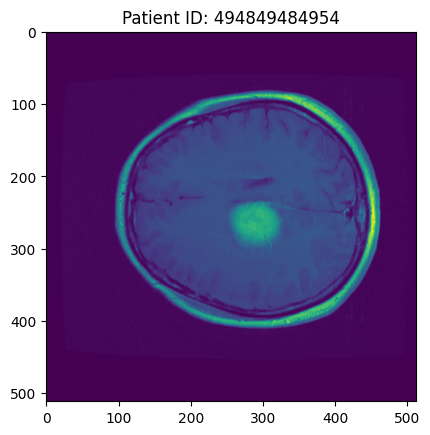

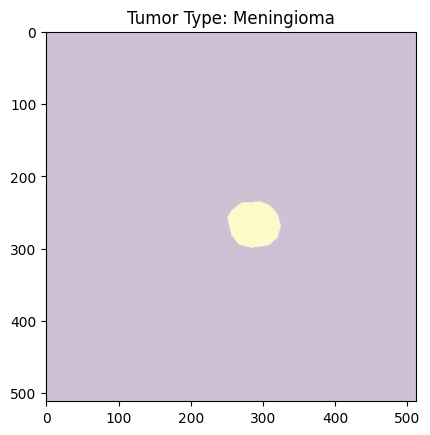

In [9]:
fig = plt.figure(figsize=(10, 7))

for x in files[0:10]: 
    f = h5py.File(x, 'r')

    rows = 1
    columns = 2

    fig.add_subplot(rows, columns, 1)
    
    PID = f['cjdata']['PID']
    PID = list(chain(*PID))
    PID = ''.join([str(item) for item in PID])
    PatID = "Patient ID: " + PID
    print('\033[1m', "File Location: ", '\033[0m', x)
    
    label = list(f['cjdata']['label'])
    for i in range(0, len(label)):
        label[i] = int(label[i])
    label = ''.join([str(item) for item in label])
    
    image = f['cjdata']['image']
    imgplot = plt.imshow(image)
    
    plt.title(PatID)
    plt.show()
    
    fig.add_subplot(rows, columns, 2)

    PID = f['cjdata']['PID']
    PID = list(chain(*PID))
    PID = ''.join([str(item) for item in PID])
    PatID = "Patient ID: " + PID
    
    label = list(f['cjdata']['label'])
    for i in range(0, len(label)):
        label[i] = int(label[i])
    label = ''.join([str(item) for item in label])
    
    tumorMask = f['cjdata']['tumorMask']
    maskplot = plt.imshow(tumorMask, alpha=0.25)
    if label == "1":
        newlabel = "Meningioma"
    elif label == "2":
        newlabel = "Glioma"
    elif label == "3":
        newlabel = "Pituitary Tumor"
    else:
        newlabel = "NaN"
    
    plt.title("Tumor Type: " + newlabel)
    plt.show(block=True)

In [10]:
print(labels)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '3', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',

In [11]:
print(tumlab)

['Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Pituitary Tumor', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 'Meningioma', 

Importing MRI scan and Tumor Masks Method 2: Show image via .png file

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0001_mri.png


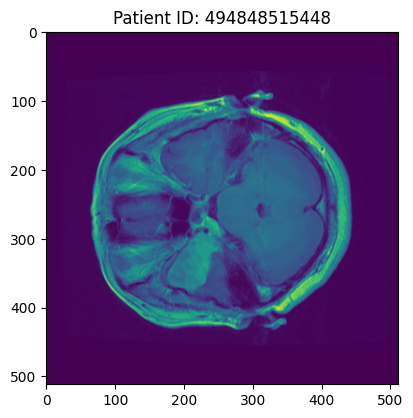

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0001_mask.png


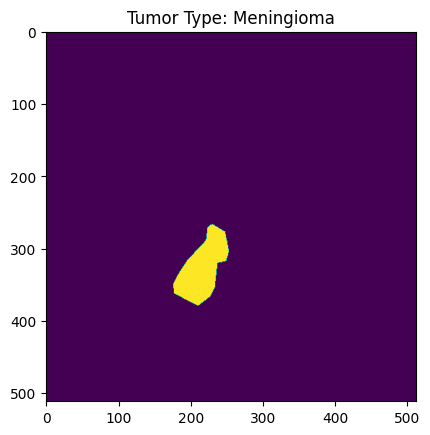

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0002_mri.png


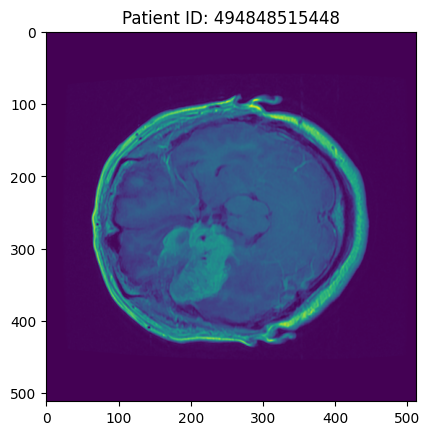

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0002_mask.png


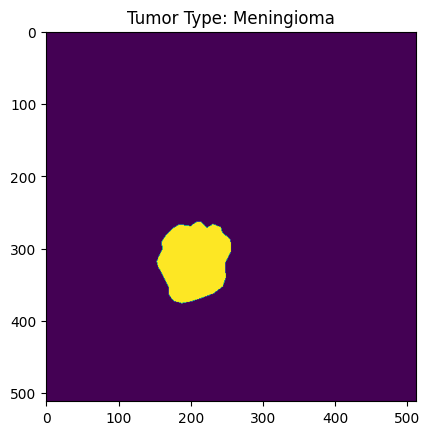

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0003_mri.png


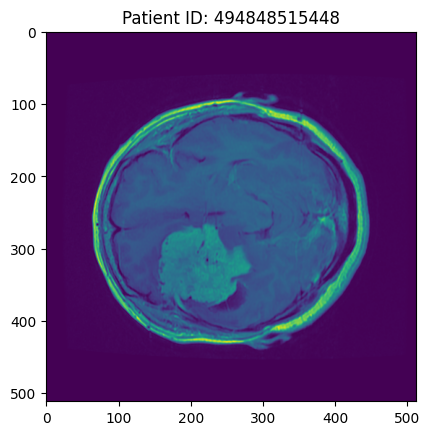

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0003_mask.png


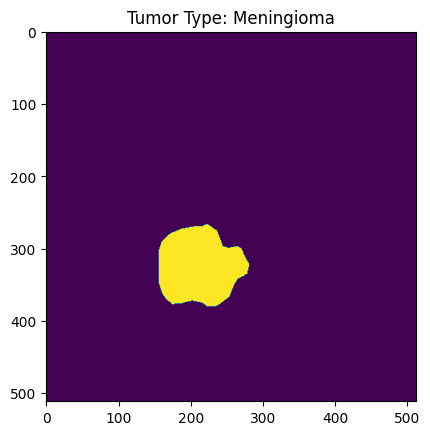

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0004_mri.png


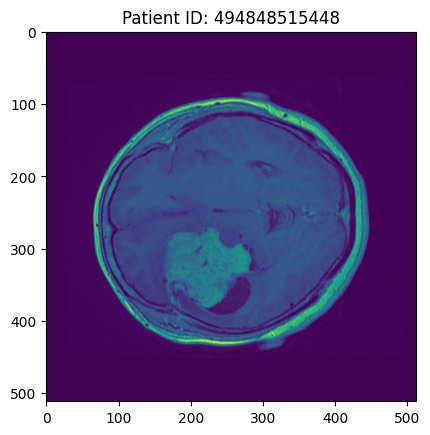

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0004_mask.png


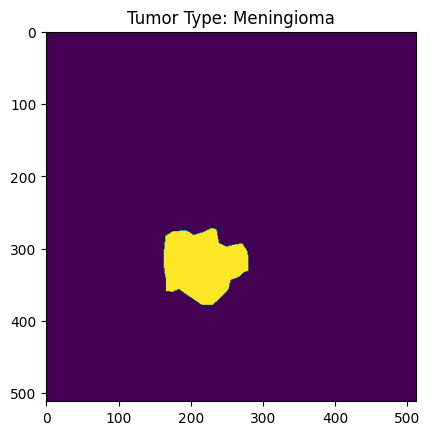

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0005_mri.png


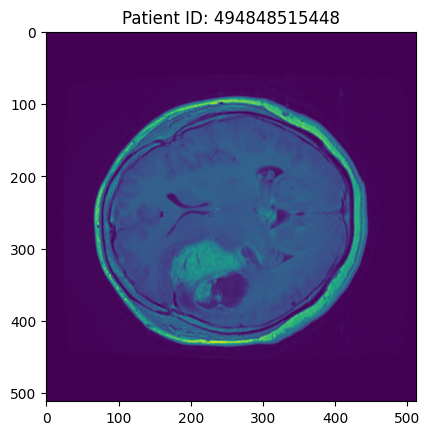

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0005_mask.png


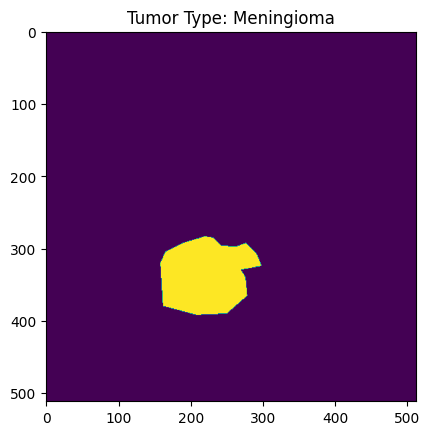

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0006_mri.png


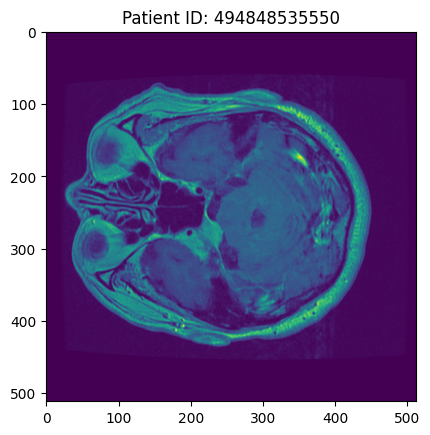

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0006_mask.png


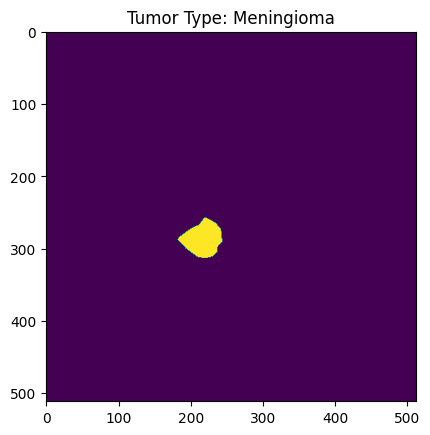

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0007_mri.png


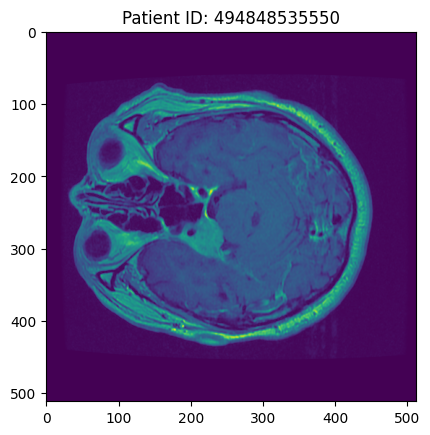

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0007_mask.png


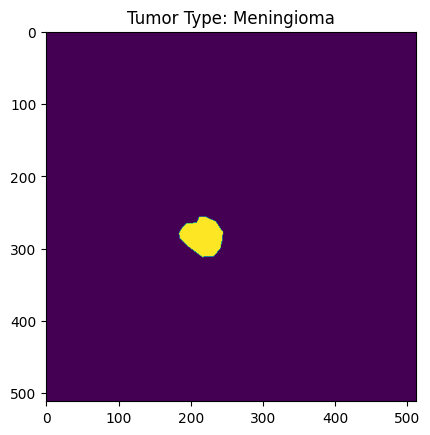

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0008_mri.png


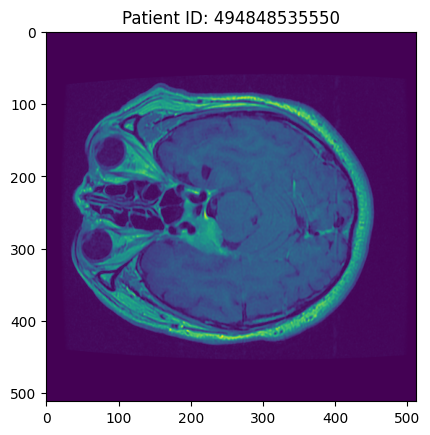

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0008_mask.png


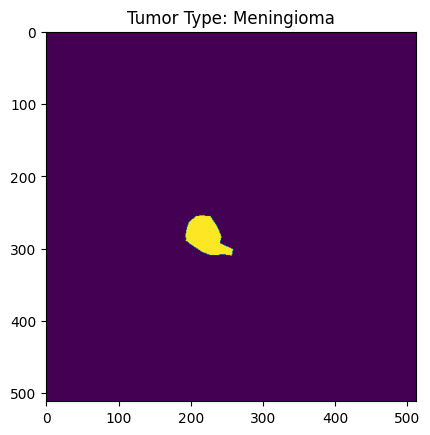

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0009_mri.png


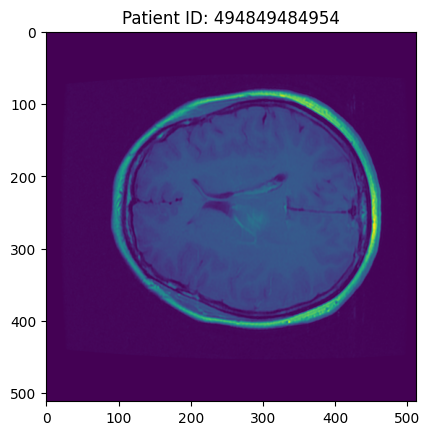

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0009_mask.png


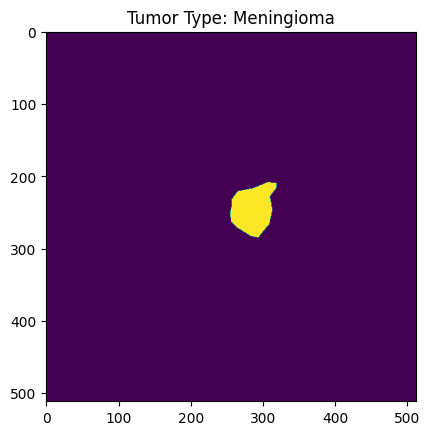

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0010_mri.png


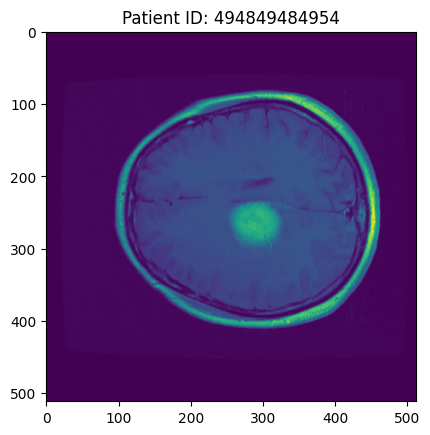

 File Location:   C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0010_mask.png


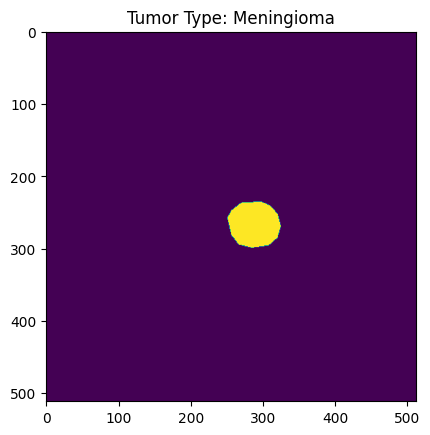

In [12]:
fig = plt.figure(figsize=(10, 7))

for x in new_files[0:10]:
    f = h5py.File(x + '.mat', 'r')
    
    rows = 1
    columns = 2
    fig.add_subplot(rows, columns, 1)
    
    PID = f['cjdata']['PID']
    PID = list(chain(*PID))
    PID = ''.join([str(item) for item in PID])
    PatID = "Patient ID: " + PID
    print('\033[1m', "File Location: ", '\033[0m', folder + 'images/' + x + '_mri.png')
    
    label = list(f['cjdata']['label'])
    for i in range(0, len(label)):
        label[i] = int(label[i])
    label = ''.join([str(item) for item in label])
    
    image2 = Image.open(folder + 'images/' + x + '_mri.png')
    imgplot2 = plt.imshow(image2)
    
    plt.title(PatID)
    plt.show()
    
    fig.add_subplot(rows, columns, 2)

    PID = f['cjdata']['PID']
    PID = list(chain(*PID))
    PID = ''.join([str(item) for item in PID])
    PatID = "Patient ID: " + PID
    print('\033[1m', "File Location: ", '\033[0m', folder + 'images/' + x + '_mask.png')    
    
    label = list(f['cjdata']['label'])
    for i in range(0, len(label)):
        label[i] = int(label[i])
    label = ''.join([str(item) for item in label])
    
    tumorMask2 = Image.open(folder + 'images/' + x + '_mask.png')
    maskplot2 = plt.imshow(tumorMask2)
    
    if label == "1":
        newlabel = "Meningioma"
    elif label == "2":
        newlabel = "Glioma"
    elif label == "3":
        newlabel = "Pituitary Tumor"
    else:
        newlabel = "NaN"
    
    maskimg = cv2.imread(folder + 'images/' + x + '_mri.png')
    lowcolor = (0,0,0)
    highcolor =(255,255,255)
    
    
    plt.title("Tumor Type: " + newlabel)
    plt.show()
    
fig.tight_layout()

In [13]:
# print(mri_png)
# print(mask_png)

Building DataFrame

In [14]:
df = {}

In [15]:
df = pd.DataFrame(df)
df['File Name'] = files
df['Patient ID'] = P_ID
df['Labels'] = labels
df['Tumor Type'] = tumlab
df['MRI .png File Location'] = mri_png
df['Mask .png File Location'] = mask_png


print(df)

     File Name          Patient ID Labels  Tumor Type  \
0     0001.mat        494848515448      1  Meningioma   
1     0002.mat        494848515448      1  Meningioma   
2     0003.mat        494848515448      1  Meningioma   
3     0004.mat        494848515448      1  Meningioma   
4     0005.mat        494848515448      1  Meningioma   
...        ...                 ...    ...         ...   
3059  3060.mat  778248505750485773      2      Glioma   
3060  3061.mat  778248505750485773      2      Glioma   
3061  3062.mat  778248505750485773      2      Glioma   
3062  3063.mat          5753575457      1  Meningioma   
3063  3064.mat          5656534948      1  Meningioma   

                                 MRI .png File Location  \
0     C:/Users/vinhm/OneDrive/Documents/School Docum...   
1     C:/Users/vinhm/OneDrive/Documents/School Docum...   
2     C:/Users/vinhm/OneDrive/Documents/School Docum...   
3     C:/Users/vinhm/OneDrive/Documents/School Docum...   
4     C:/Users/vinhm

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   File Name                3064 non-null   object
 1   Patient ID               3064 non-null   object
 2   Labels                   3064 non-null   object
 3   Tumor Type               3064 non-null   object
 4   MRI .png File Location   3064 non-null   object
 5   Mask .png File Location  3064 non-null   object
dtypes: object(6)
memory usage: 143.8+ KB


In [17]:
df['Labels'].value_counts()

2    1426
3     930
1     708
Name: Labels, dtype: int64

In [18]:
df['Mask .png File Location'][0]

'C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 2/Capstones/Capstone 2 Brain Tumor Classification/Data/images/0001_mask.png'

In [19]:
cv2.imread(df['Mask .png File Location'][0]).min()

0

In [20]:
cv2.imread(df['Mask .png File Location'][0]).max()

255

There are now two routes that can be followed in building the prediction model. 
1. Since the data contains only images that have existing tumors and no control group, the model can be produced to determine what kind of tumor exists (1 = "Meningioma", 2 = "Glioma", 3 = "Pituitary Tumor").
2. Alternatively, a control group can be added to the data, in which no tumor exists, as a base reference. Then, a model can be built to determine if any tumor exists at all.


In [21]:
df['Tumor Type'].value_counts()

Glioma             1426
Pituitary Tumor     930
Meningioma          708
Name: Tumor Type, dtype: int64

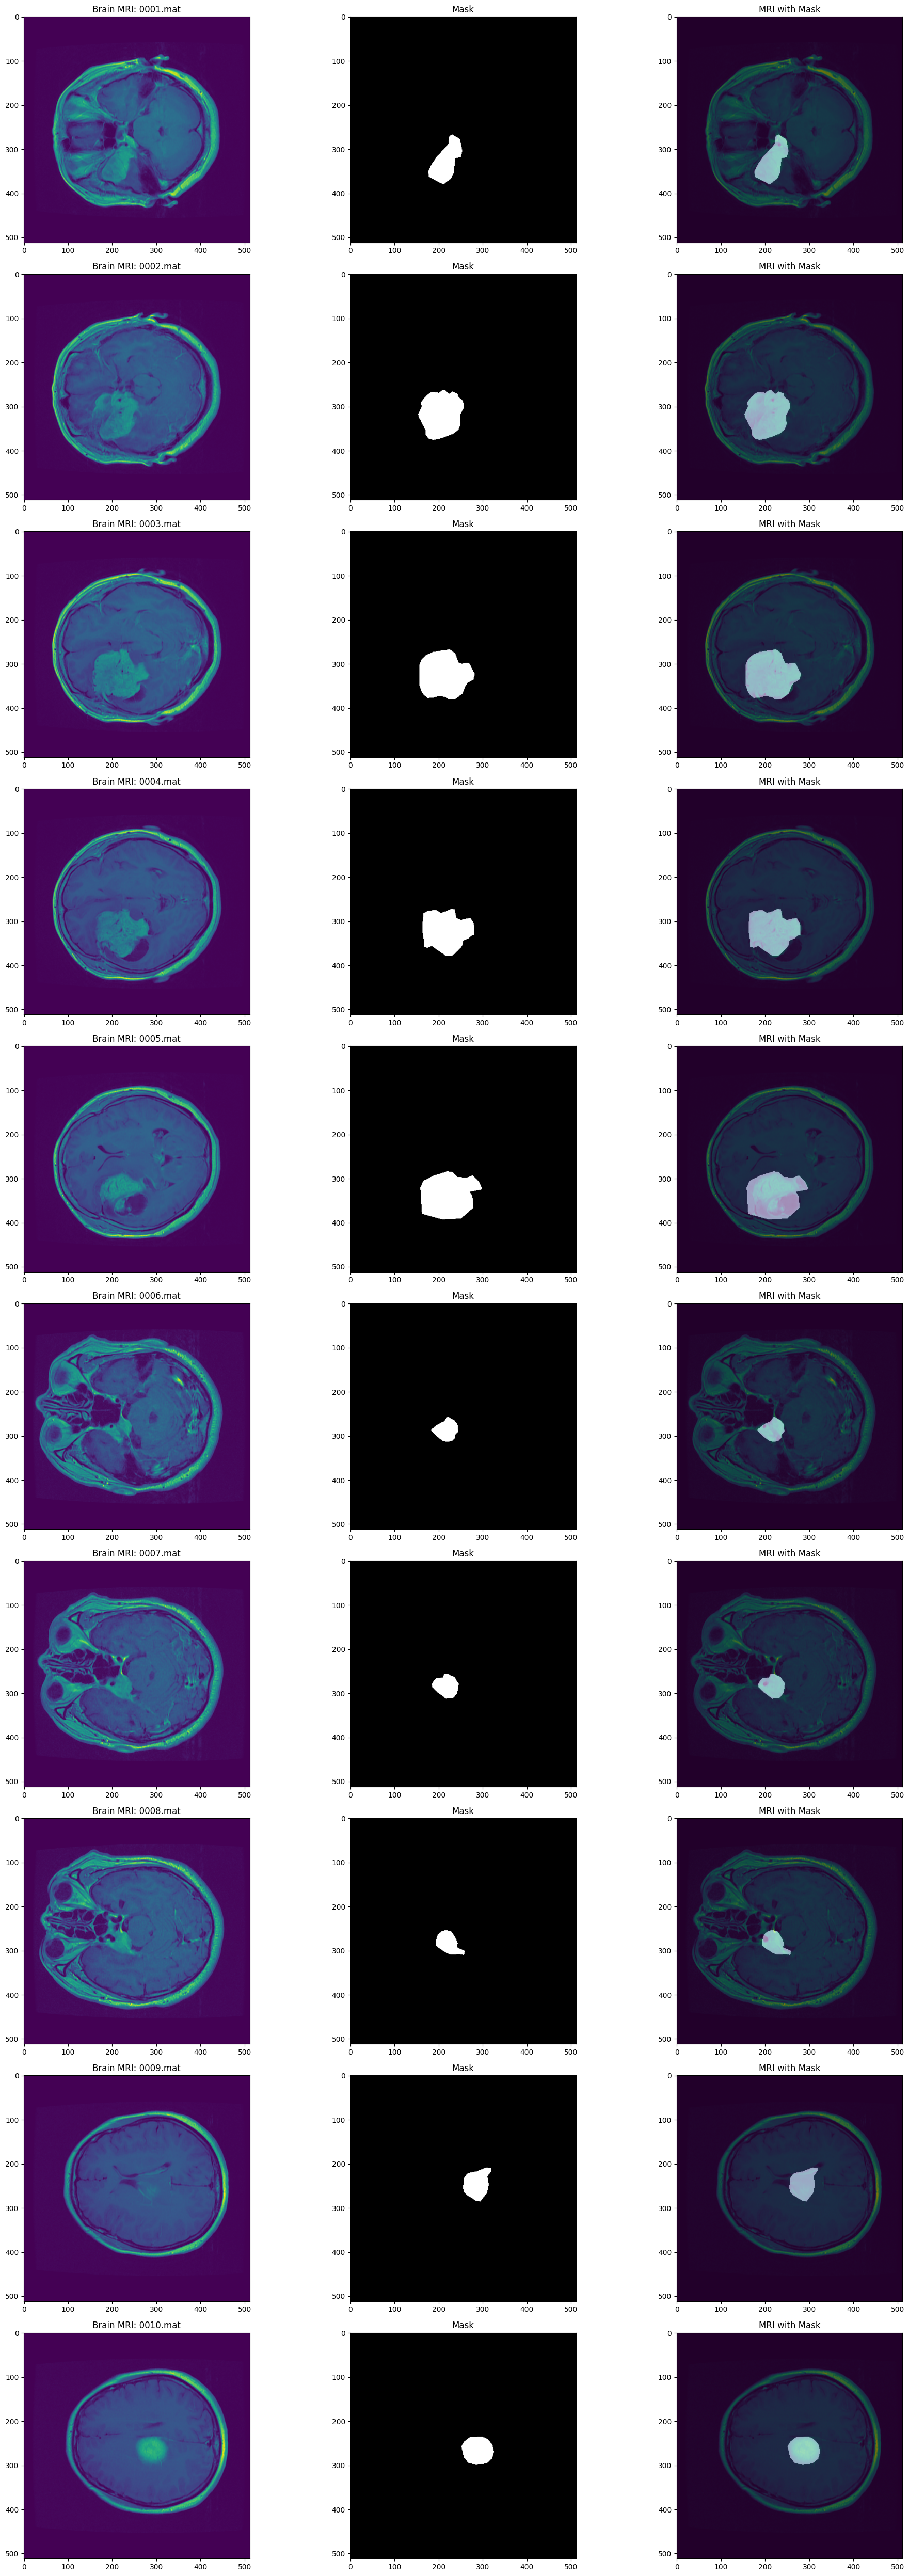

In [22]:
count = 0
fig, axs = plt.subplots(10, 3, figsize = (20, 50)) 

for i in range(10):
    img = io.imread(df['MRI .png File Location'][i])
    axs[count][0].title.set_text('Brain MRI: ' + df['File Name'][i])
    axs[count][0].imshow(img)
    
    mask = io.imread(df['Mask .png File Location'][i])
    axs[count][1].title.set_text('Mask')
    axs[count][1].imshow(mask, cmap = 'gray')
    
    axs[count][2].title.set_text('MRI with Mask')
    axs[count][2].imshow(img)
    axs[count][2].imshow(mask, cmap = 'gray', alpha=0.5)
    count+=1

fig.tight_layout()

In [23]:
df.head()

File Name    Patient ID Labels  Tumor Type  \
0  0001.mat  494848515448      1  Meningioma   
1  0002.mat  494848515448      1  Meningioma   
2  0003.mat  494848515448      1  Meningioma   
3  0004.mat  494848515448      1  Meningioma   
4  0005.mat  494848515448      1  Meningioma   

                              MRI .png File Location  \
0  C:/Users/vinhm/OneDrive/Documents/School Docum...   
1  C:/Users/vinhm/OneDrive/Documents/School Docum...   
2  C:/Users/vinhm/OneDrive/Documents/School Docum...   
3  C:/Users/vinhm/OneDrive/Documents/School Docum...   
4  C:/Users/vinhm/OneDrive/Documents/School Docum...   

                             Mask .png File Location  
0  C:/Users/vinhm/OneDrive/Documents/School Docum...  
1  C:/Users/vinhm/OneDrive/Documents/School Docum...  
2  C:/Users/vinhm/OneDrive/Documents/School Docum...  
3  C:/Users/vinhm/OneDrive/Documents/School Docum...  
4  C:/Users/vinhm/OneDrive/Documents/School Docum...

Drop the Patient ID, File Name and Tumor Type columns as it is not further required for processing.

In [24]:
# Drop the patient id column
df = df.drop(columns = ['Patient ID'])
df = df.drop(columns = ['File Name'])
df = df.drop(columns = ['Tumor Type'])
df.shape

(3064, 3)

In [25]:
df['Labels'] = df['Labels'].apply(lambda x: str(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Labels                   3064 non-null   object
 1   MRI .png File Location   3064 non-null   object
 2   Mask .png File Location  3064 non-null   object
dtypes: object(3)
memory usage: 71.9+ KB


Split the data into train and test sets.

In [26]:
train, test = train_test_split(df, test_size = 0.15)

In [27]:
train.shape

(2604, 3)

In [28]:
test.shape

(460, 3)

In [29]:
# create an image generator
from keras_preprocessing.image import ImageDataGenerator

#Create a data generator which scales the data from 0 to 1 and makes validation split of 0.15
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)

train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='MRI .png File Location',
y_col='Labels',
subset="training",
batch_size=32,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='MRI .png File Location',
y_col='Labels',
subset="validation",
batch_size=32,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Create a data generator for test images
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='MRI .png File Location',
y_col='Labels',
batch_size=32,
shuffle=False,
class_mode='categorical',
target_size=(256,256))

Found 2214 validated image filenames belonging to 3 classes.
Found 390 validated image filenames belonging to 3 classes.
Found 460 validated image filenames belonging to 3 classes.


In [30]:
imgs, labels = next(train_generator)

In [31]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()    
    plt.show()

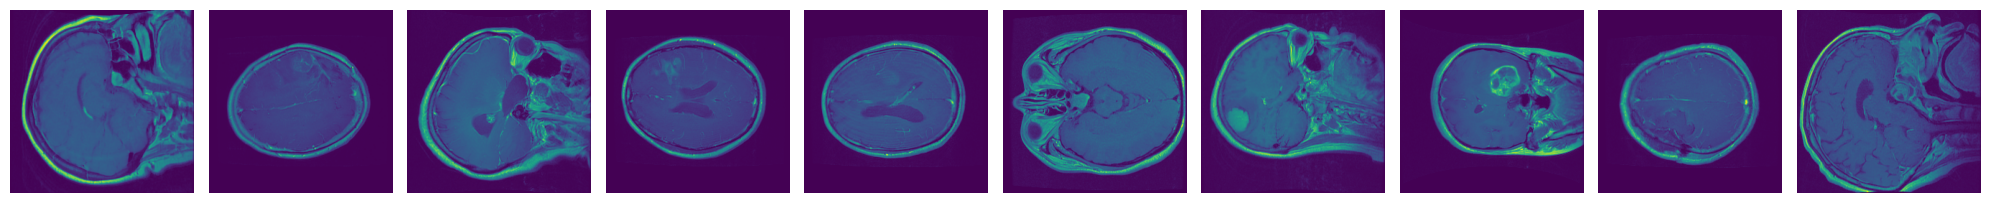

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [32]:
plotImages(imgs)
print(labels)

In [33]:
# Get the ResNet50 base model (Transfer Learning)
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [34]:
# freeze the model weights
for layer in basemodel.layers:
  layers.trainable = False

In [35]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(3, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [36]:
# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [37]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the model with least validation loss
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [38]:
modfit = model.fit(x=train_generator, 
                   steps_per_epoch= train_generator.n // 32,
                   epochs = 100, 
                   validation_data= valid_generator, 
                   validation_steps= valid_generator.n // 32, 
                   callbacks=[checkpointer, earlystopping])
modfit

Epoch 1/100
69/69 [==============================] - 29s 264ms/step - loss: 0.6284 - accuracy: 0.7709 - val_loss: 2807.6035 - val_accuracy: 0.5052

Epoch 00001: val_loss improved from inf to 2807.60352, saving model to classifier-resnet-weights.hdf5


C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
69/69 [==============================] - 15s 220ms/step - loss: 0.4254 - accuracy: 0.8437 - val_loss: 2263.7839 - val_accuracy: 0.5078

Epoch 00002: val_loss improved from 2807.60352 to 2263.78394, saving model to classifier-resnet-weights.hdf5
Epoch 3/100
69/69 [==============================] - 22s 316ms/step - loss: 0.5555 - accuracy: 0.8272 - val_loss: 3182.3838 - val_accuracy: 0.5104

Epoch 00003: val_loss did not improve from 2263.78394
Epoch 4/100
69/69 [==============================] - 20s 287ms/step - loss: 0.5828 - accuracy: 0.7699 - val_loss: 1.0679 - val_accuracy: 0.5104

Epoch 00004: val_loss improved from 2263.78394 to 1.06790, saving model to classifier-resnet-weights.hdf5
Epoch 5/100
69/69 [==============================] - 20s 279ms/step - loss: 0.3423 - accuracy: 0.8717 - val_loss: 1.0535 - val_accuracy: 0.5078

Epoch 00005: val_loss improved from 1.06790 to 1.05347, saving model to classifier-resnet-weights.hdf5
Epoch 6/100
69/69 [=======================

Epoch 19 had the lowest 'val_loss' at 0.2189 with 0.9707 accuracy.

"Epoch 19/100
69/69 [==============================] - 17s 238ms/step - loss: 0.0919 - accuracy: 0.9707 - val_loss: 0.2189 - val_accuracy: 0.9401"

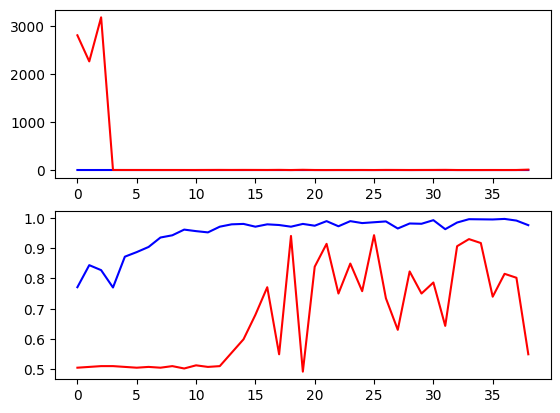

In [47]:
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(modfit.history['loss'],color='b',label='Training Loss')
ax[0].plot(modfit.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(modfit.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(modfit.history['val_accuracy'],color='r',label='Validation Accuracy')

In [49]:
# make prediction
test_predict = model.predict(test_generator, steps = test_generator.n // 32, verbose =1)

# Obtain the predicted class from the model prediction
predict = []
for i in test_predict:
  predict.append(str(np.argmax(i)))
predict = np.asarray(predict)

14/14 [==============================] - 3s 182ms/step
